In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 칼럼(개인)

price 이상치 어떻게 처리할지!!


없앨 칼럼
id
listing_url
scrape_id
last_scraped
[0]~[3]

4 source : 이용 가능한 것으로 확인

name
description
[5, 6]

8 picture_url
9 host_id
10 host_url
11 host_name
12 host_since
13 host_location
14 host_about (자기소개)

19  host_thumbnail_url                            24342 non-null  object 
20  host_picture_url                              24342 non-null  object 
21  host_neighbourhood                            6874 non-null   object
22  host_listings_count                           24342 non-null  float64
23  host_total_listings_count                     24342 non-null  float64
24  host_verifications                            24342 non-null  object
-> 연락 수단

27  neighbourhood                                 14048 non-null  object 
-> 결측치 다수 존재

28  neighbourhood_cleansed                        25297 non-null  object 
29  neighbourhood_group_cleansed                  0 non-null      float64

36  bathrooms_text                                25251 non-null  object 

41  minimum_nights                                25297 non-null  int64  
42  maximum_nights                                25297 non-null  int64  
43  minimum_minimum_nights                        25284 non-null  float64
44  maximum_minimum_nights                        25284 non-null  float64
45  minimum_maximum_nights                        25284 non-null  float64
46  maximum_maximum_nights                        25284 non-null  float64

47  minimum_nights_avg_ntm                        25297 non-null  float64
48  maximum_nights_avg_ntm                        25297 non-null  float64
-> 최소 n박 수 평균, 최대 n박 수 평균

49  calendar_updated                              0 non-null      float64

50  has_availability                              25186 non-null  object 
51  availability_30                               25297 non-null  int64  
52  availability_60                               25297 non-null  int64  
53  availability_90                               25297 non-null  int64  
54  availability_365                              25297 non-null  int64

55  calendar_last_scraped                         25297 non-null  object 

-
59  availability_eoy                              25297 non-null  int64  
60  number_of_reviews_ly                          25297 non-null  int64  
61  estimated_occupancy_l365d                     25297 non-null  int64
-> 추정 점유율...
62  estimated_revenue_l365d                       23260 non-null  float64
-- 추정 수익...
-

63  first_review                                  21724 non-null  object 
64  last_review                                   21724 non-null  object 

72  license                                       25278 non-null  object 
-> 라이선스 번호

74  calculated_host_listings_count                25297 non-null  int64  
75  calculated_host_listings_count_entire_homes   25297 non-null  int64  
76  calculated_host_listings_count_private_rooms  25297 non-null  int64  
77  calculated_host_listings_count_shared_rooms   25297 non-null  int64  




애매

7 neighborhood_overview : 호스트가 직접 설명해둔 근처 볼거리? -> 처리 애매

15 host_response_time   : 답장 평균 시간
16 host_response_rate   : 답장률
17 host_acceptance_rate : 호스트가 예약 요청을 수락하는 비율


25  host_has_profile_pic                          24342 non-null  object
-> 호스트 사진이 있고 없고
--> 답장 시간, 답장률과의 상관관계??


57  number_of_reviews_ltm                         25297 non-null  int64  
-> 1년 동안 리뷰 개수
58  number_of_reviews_l30d                        25297 non-null  int64
-> 최근 30일 간 리뷰 개수  


73  instant_bookable                              25297 non-null  object
-> 호스트가 예약 요청을 수락하지 않아도 게스트가 자동으로 목록을 예약할 수 있는지 여부

78  reviews_per_month                             21724 non-null  float64
-> 매월 평균 리뷰 수



꼭

18 host_is_superhost
결측치 2천

-- 26 host_identity_verified 24342
955개 NaN -> f 처리?

-- 30  latitude                                      25297 non-null  float64
-- 31  longitude                                     25297 non-null  float64
경도 위도

32  property_type                                 25297 non-null  object 
33  room_type                                     25297 non-null  object 
34  accommodates                                  25297 non-null  int64  
35  bathrooms                                     23253 non-null  float64
37  bedrooms                                      25040 non-null  float64
38  beds                                          23255 non-null  float64
39  amenities                                     25297 non-null  object 
40  price                                         23260 non-null  object
-> daily price in local currency.


? 56  number_of_reviews                             25297 non-null  int64  
-> 전체 리뷰 개수

65  review_scores_rating                          21724 non-null  float64
66  review_scores_accuracy                        21720 non-null  float64
67  review_scores_cleanliness                     21720 non-null  float64
68  review_scores_checkin                         21720 non-null  float64
69  review_scores_communication                   21720 non-null  float64
70  review_scores_location                        21720 non-null  float64
71  review_scores_value                           21720 non-null  float64

수치화, 범례화 못하면 ~

eda_pdy

live_list = [
'neighbourhood_cleansed',
-'property_type',
-'room_type',
-'accommodates',
-'bathrooms',
-'bedrooms',
-'beds',
'amenities',
'number_of_reviews',	                        # 총 리뷰 개수입니다.
'number_of_reviews_ltm',	                    # 지난 12개월 동안의 리뷰 개수입니다.
'number_of_reviews_l30d',	                    # 지난 30일 동안의 리뷰 개수입니다.
'number_of_reviews_ly',	                        # 지난 1년 동안의 리뷰 개수입니다.
'first_review',	                                # 첫 번째 리뷰가 작성된 날짜입니다.
'last_review',	                                # 마지막 리뷰가 작성된 날짜입니다.

-'review_scores_rating',	                        # 총 리뷰 점수(별점)의 평균값입니다.

'price': 결측치 제거 기준 범섭님
]

In [2]:
# 1. 데이터 로드
tokyo_df = pd.read_csv('listings.csv.gz', compression='gzip')
tokyo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25297 non-null  int64  
 1   listing_url                                   25297 non-null  object 
 2   scrape_id                                     25297 non-null  int64  
 3   last_scraped                                  25297 non-null  object 
 4   source                                        25297 non-null  object 
 5   name                                          25297 non-null  object 
 6   description                                   24879 non-null  object 
 7   neighborhood_overview                         14048 non-null  object 
 8   picture_url                                   25297 non-null  object 
 9   host_id                                       25297 non-null 

In [3]:
drop_list = [
'id',	                                        # 각 숙소의 고유 식별자입니다.
'listing_url',	                                # 숙소의 웹페이지 URL입니다.
'scrape_id',	                                # 데이터 스크래핑 작업의 고유 식별자입니다.
'last_scraped',	                                # 숙소 정보가 마지막으로 스크래핑된 날짜입니다.
'source',	                                    # 숙소 정보의 출처입니다.
'name',	                                        # 숙소의 이름입니다.
'description',	                                # 숙소에 대한 상세 설명입니다.
'neighborhood_overview',	                    # 숙소 주변 지역에 대한 설명입니다.
'picture_url',	                                # 숙소 대표 사진의 URL입니다.
'host_id',	                                    # 호스트의 고유 식별자입니다.
'host_url',	                                    # 호스트의 웹페이지 URL입니다.
'host_name',	                                # 호스트의 이름입니다.
'host_since',	                                # 호스트가 에어비앤비에 가입한 날짜입니다.
'host_location',	                            # 호스트의 위치입니다.
'host_about',	                                # 호스트에 대한 자기소개입니다.
'host_response_time',	                        # 호스트의 평균 응답 시간입니다.
'host_response_rate',	                        # 호스트의 응답률입니다.
'host_acceptance_rate',	                        # 호스트의 예약 수락률입니다.
'host_is_superhost',	                        # 호스트가 슈퍼호스트인지 여부입니다.
'host_thumbnail_url',	                        # 호스트 프로필 썸네일 이미지의 URL입니다.
'host_picture_url',	                            # 호스트 프로필 사진의 URL입니다.
'host_neighbourhood',	                        # 호스트가 거주하는 지역입니다.
'host_listings_count',	                        # 해당 호스트가 보유한 전체 숙소 수입니다.
'host_total_listings_count',	                # 해당 호스트가 소유하거나 관리하는 전체 숙소 수입니다.
'host_verifications',	                        # 호스트의 인증 정보 목록입니다.
'host_has_profile_pic',	                        # 호스트가 프로필 사진을 가지고 있는지 여부입니다.
'host_identity_verified',	                    # 호스트 신원이 인증되었는지 여부입니다.
'neighbourhood',	                            # 숙소가 위치한 지역의 이름입니다.
'neighbourhood_cleansed',	                    # 정제된 숙소 지역 이름입니다.
'neighbourhood_group_cleansed',	                # 정제된 숙소 지역 그룹 이름입니다.
'latitude',	                                    # 숙소의 위도입니다.
'longitude',	                                # 숙소의 경도입니다.
# 'property_type',	                            # 숙소의 종류입니다.
# 'room_type',	                                # 숙소의 방 유형입니다.
# 'accommodates',	                                # 숙소가 수용 가능한 최대 인원 수입니다.
# 'bathrooms',	                                # 숙소의 욕실 개수입니다.
'bathrooms_text',	                            # 숙소의 욕실 개수를 설명하는 텍스트입니다.
# 'bedrooms',	                                    # 숙소의 침실 개수입니다.
# 'beds',	                                        # 숙소의 침대 개수입니다.
# 'amenities',	                                # 숙소에 제공되는 편의 시설 목록입니다.
# 'price',	                                    # 숙소의 1박당 가격입니다.
'minimum_nights',	                            # 최소 숙박 가능 일수입니다.
'maximum_nights',	                            # 최대 숙박 가능 일수입니다.
'minimum_minimum_nights',	                    # 호스트가 설정한 최소 숙박 일수 중 가장 낮은 값입니다.
'maximum_minimum_nights',	                    # 호스트가 설정한 최소 숙박 일수 중 가장 높은 값입니다.
'minimum_maximum_nights',	                    # 호스트가 설정한 최대 숙박 일수 중 가장 낮은 값입니다.
'maximum_maximum_nights',	                    # 호스트가 설정한 최대 숙박 일수 중 가장 높은 값입니다.
'minimum_nights_avg_ntm',	                    # 최소 숙박 일수의 평균값입니다.
'maximum_nights_avg_ntm',	                    # 최대 숙박 일수의 평균값입니다.
'calendar_updated',	                            # 달력이 마지막으로 업데이트된 시점입니다.
'has_availability',	                            # 숙소 예약 가능 여부입니다.
'availability_30',	                            # 향후 30일 동안의 숙소 예약 가능 일수입니다.
'availability_60',	                            # 향후 60일 동안의 숙소 예약 가능 일수입니다.
'availability_90',	                            # 향후 90일 동안의 숙소 예약 가능 일수입니다.
'availability_365',	                            # 향후 365일 동안의 숙소 예약 가능 일수입니다.
'calendar_last_scraped',	                    # 달력 정보가 마지막으로 스크래핑된 날짜입니다.
# 'number_of_reviews',	                        # 총 리뷰 개수입니다.
# 'number_of_reviews_ltm',	                    # 지난 12개월 동안의 리뷰 개수입니다.
# 'number_of_reviews_l30d',	                    # 지난 30일 동안의 리뷰 개수입니다.
'availability_eoy',	                            # 연말까지의 예약 가능 일수입니다.
# 'number_of_reviews_ly',	                        # 지난 1년 동안의 리뷰 개수입니다.
'estimated_occupancy_l365d',	                # 지난 365일 동안의 예상 점유율입니다.
'estimated_revenue_l365d',	                    # 지난 365일 동안의 예상 수입입니다.
# 'first_review',	                                # 첫 번째 리뷰가 작성된 날짜입니다.
# 'last_review',	                                # 마지막 리뷰가 작성된 날짜입니다.
# 'review_scores_rating',	                        # 총 리뷰 점수(별점)의 평균값입니다.
'review_scores_accuracy',	                    # 정확도 리뷰 점수입니다.
'review_scores_cleanliness',	                # 청결도 리뷰 점수입니다.
'review_scores_checkin',	                    # 체크인 경험 리뷰 점수입니다.
'review_scores_communication',	                # 소통 리뷰 점수입니다.
'review_scores_location',	                    # 위치 리뷰 점수입니다.
'review_scores_value',	                        # 가격 대비 가치 리뷰 점수입니다.
'license',	                                    # 숙소의 라이선스 정보입니다.
'instant_bookable',	                            # 즉시 예약이 가능한 숙소인지 여부입니다.
'calculated_host_listings_count',	            # 호스트가 등록한 숙소 개수입니다.
'calculated_host_listings_count_entire_homes',	# 호스트가 등록한 '전체 숙소/아파트' 유형의 개수입니다.
'calculated_host_listings_count_private_rooms',	# 호스트가 등록한 '개인실' 유형의 개수입니다.
'calculated_host_listings_count_shared_rooms',	# 호스트가 등록한 '공용 공간' 유형의 개수입니다.
'reviews_per_month'	                            # 월별 평균 리뷰 개수입니다.
]

df_listings = tokyo_df.drop(drop_list, axis=1)
df_listings

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,first_review,last_review,review_scores_rating
0,Entire rental unit,Entire home/apt,3,1.0,0.0,2.0,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",0,0,0,0,NaN,NaN,NaN
1,Entire rental unit,Entire home/apt,8,1.0,2.0,5.0,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",0,0,0,0,NaN,NaN,NaN
2,Entire serviced apartment,Entire home/apt,4,2.0,2.0,2.0,"[""Room-darkening shades"", ""Body soap"", ""Carbon...","$14,550.00",24,11,0,21,2023-12-04,2025-04-19,4.42
3,Entire home,Entire home/apt,8,1.0,3.0,6.0,"[""Room-darkening shades"", ""Cooking basics"", ""C...","$22,012.00",15,12,1,8,2024-01-10,2025-06-08,4.73
4,Entire rental unit,Entire home/apt,3,1.0,1.0,1.0,"[""Clothing storage: closet"", ""Elevator"", ""Hair...","$15,429.00",17,8,1,11,2023-12-26,2025-06-07,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25292,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,"[""Elevator"", ""Hair dryer"", ""Lockbox"", ""Stove"",...","$12,306.00",0,0,0,0,NaN,NaN,NaN
25293,Entire home,Entire home/apt,11,1.0,4.0,7.0,"[""Bidet"", ""Cooking basics"", ""Body soap"", ""Stov...","$40,732.00",0,0,0,0,NaN,NaN,NaN
25294,Entire home,Entire home/apt,7,1.0,3.0,4.0,"[""Record player"", ""Private patio or balcony"", ...","$64,436.00",0,0,0,0,NaN,NaN,NaN
25295,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Bidet"", ""Room-darkening shades"", ""Cooking ba...","$17,046.00",0,0,0,0,NaN,NaN,NaN


##### tokyo_df 조회

In [60]:
tokyo_df.iloc[13572, :10]

id                                                     1140425389276737407
listing_url               https://www.airbnb.com/rooms/1140425389276737407
scrape_id                                                   20250627030533
last_scraped                                                    2025-07-01
source                                                         city scrape
name                                                          男女混合ドミトリー1名分
description              5mins access from Tameike Sanno station (Ginza...
neighborhood_overview                                                  NaN
picture_url              https://a0.muscache.com/pictures/hosting/Hosti...
host_id                                                          573624309
Name: 13572, dtype: object

### beds, bathrooms, bedrooms 이상치 처리

In [43]:
tokyo_df[tokyo_df['host_id']==12014384].loc[:, ['bedrooms', 'beds']]

,bedrooms,beds
1336,50.0,35.0
1411,36.0,50.0
2007,1.0,40.0
2008,30.0,13.0
2084,35.0,14.0
5073,1.0,8.0


#####

In [ ]:
# bathrooms, bedrooms, beds 이상치 처리 시도 -> 이상치 한두 개에 대해 같은 host임을 발견 -> host_id 제거해서 확인 -> 이상치 여전히 존재
# -> 도미토리임을 확인 -> 같이 드랍?

to =tokyo_df[tokyo_df['host_id']!=12014384]
to.iloc[:, 30:50].describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated
count,25291.000000,25291.000000,25291.000000,23247.000000,25034.000000,23249.000000,25291.000000,25291.000000,25278.000000,25278.000000,25278.000000,25278.000000,25291.000000,25291.000000,0.0
mean,35.698075,139.737061,4.419121,1.155095,1.400575,2.928943,5.363529,348.805781,4.999921,6.300261,496.158478,531.056057,5.572030,515.130805,NaN
std,0.042666,0.072967,2.928186,0.528262,0.964165,2.285147,11.267669,297.161036,10.437985,12.062898,384.035453,409.866268,10.829632,381.384722,NaN
min,35.520940,139.081322,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,35.687164,139.699207,2.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,1.000000,365.000000,365.000000,1.000000,365.000000,NaN
50%,35.704120,139.727800,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,1.000000,2.000000,365.000000,365.000000,2.000000,365.000000,NaN
75%,35.723496,139.793264,6.000000,1.000000,2.000000,4.000000,2.000000,365.000000,2.000000,3.000000,1124.000000,1125.000000,3.000000,1124.000000,NaN
max,35.840764,139.914020,16.000000,19.500000,18.000000,40.000000,365.000000,20000.000000,365.000000,365.000000,1125.000000,20000.000000,365.000000,4668.600000,NaN


In [59]:
to[to['beds']>30].iloc[:, 30:40]

,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities
13572,35.672257,139.739759,Shared room in hotel,Shared room,1,0.5,Shared half-bath,1.0,40.0,"[""Hair dryer"", ""Fire extinguisher"", ""Rice make..."
13573,35.672218,139.739764,Shared room in hotel,Shared room,2,1.0,1 shared bath,1.0,40.0,"[""Hair dryer"", ""Fire extinguisher"", ""Rice make..."


In [27]:
df_listings[(df_listings['bedrooms']==0)|(df_listings['bedrooms'].isna())]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,first_review,last_review,review_scores_rating
0,Entire rental unit,Entire home/apt,3,1.0,0.0,2.0,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...","$100,000.00",0,0,0,0,NaN,NaN,NaN
17,Entire rental unit,Entire home/apt,3,1.0,0.0,2.0,"[""Hair dryer"", ""Clothing storage"", ""Fire extin...","$10,111.00",0,0,0,0,NaN,NaN,NaN
31,Entire rental unit,Entire home/apt,3,1.0,0.0,2.0,"[""Clothing storage: closet"", ""Elevator"", ""Hair...","$11,789.00",11,11,2,5,2024-07-26,2025-06-16,4.82
33,Entire rental unit,Entire home/apt,3,1.0,0.0,2.0,"[""Bidet"", ""Private patio or balcony"", ""Body so...","$7,010.00",2,1,0,2,2024-02-25,2024-12-16,4.50
34,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,"[""Body soap"", ""Bed linens"", ""Hot water"", ""Wifi...","$5,130.00",2,1,0,2,2024-02-01,2024-10-14,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25126,Private room in rental unit,Private room,8,2.0,0.0,6.0,"[""Bidet"", ""Cooking basics"", ""Dining table"", ""T...","$33,943.00",0,0,0,0,NaN,NaN,NaN
25167,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,"[""Bidet"", ""Body soap"", ""Stove"", ""TV"", ""Hot wat...","$20,210.00",0,0,0,0,NaN,NaN,NaN
25176,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,"[""Bidet"", ""Body soap"", ""Stove"", ""TV"", ""Hot wat...","$14,204.00",0,0,0,0,NaN,NaN,NaN
25177,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,"[""Bidet"", ""Body soap"", ""Stove"", ""TV"", ""Hot wat...","$18,322.00",0,0,0,0,NaN,NaN,NaN


### 구분선

In [15]:
df_listings.info(), df_listings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           25297 non-null  object 
 1   room_type               25297 non-null  object 
 2   accommodates            25297 non-null  int64  
 3   bathrooms               23253 non-null  float64
 4   bedrooms                25040 non-null  float64
 5   beds                    23255 non-null  float64
 6   amenities               25297 non-null  object 
 7   price                   23260 non-null  object 
 8   number_of_reviews       25297 non-null  int64  
 9   number_of_reviews_ltm   25297 non-null  int64  
 10  number_of_reviews_l30d  25297 non-null  int64  
 11  number_of_reviews_ly    25297 non-null  int64  
 12  first_review            21724 non-null  object 
 13  last_review             21724 non-null  object 
 14  review_scores_rating    21724 non-null

(None,
        accommodates     bathrooms      bedrooms          beds  \
 count  25297.000000  23253.000000  25040.000000  23255.000000   
 mean       4.418824      1.156453      1.406350      2.935068   
 std        2.927961      0.541552      1.072037      2.330206   
 min        1.000000      0.000000      0.000000      0.000000   
 25%        2.000000      1.000000      1.000000      1.000000   
 50%        4.000000      1.000000      1.000000      2.000000   
 75%        6.000000      1.000000      2.000000      4.000000   
 max       16.000000     19.500000     50.000000     50.000000   
 
        number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
 count       25297.000000           25297.000000            25297.000000   
 mean           36.794837              14.128553                1.104756   
 std            66.044810              18.599768                1.691502   
 min             0.000000               0.000000                0.000000   
 25%             

In [6]:
# price 칼럼 float형 변환
df_listings['price'] = df_listings['price'].replace('[$,]', '', regex=True).astype(float)

# 화폐 단위 엔 -> 원
# df['price']/=1000

##### 결측치, 이상치 처리



1. price max인 숙소: https://www.airbnb.com/rooms/1152660137338301863
   이외에도 host가 일부러 예약을 받지 않으려고 가격을 높게 설정하는 경우 존재. -> (1) 여행객들을 위한 가격 예측이므로 상식적인 값에서 벗어나는 가격 row는 모두 삭제.

2. bathrooms, bedrooms, beds 결측치
   (1) 이중 하나라도 NaN이면 row 삭제 -> 23239개 row 존재

3. superhost, host_identity_verified 결측치

4. review_scores_~ 결측치

5. price 결측치 (중요)

In [32]:
# 숫자형 칼럼 따로 저장
df_nu = df.select_dtypes(include=['float', 'int'])
df_nu = df_nu.drop('id', axis=1)
df_nu

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,35.706170,139.745120,3,1.0,0.0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0
1,35.706254,139.745134,8,1.0,2.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0
2,35.698540,139.780864,4,2.0,2.0,2.0,24,4.42,4.38,4.71,4.58,4.88,4.83,4.38,14550.0
3,35.755420,139.732600,8,1.0,3.0,6.0,15,4.73,4.87,4.60,4.73,4.87,4.60,4.73,22012.0
4,35.715503,139.808758,3,1.0,1.0,1.0,17,5.00,5.00,5.00,4.94,5.00,4.82,4.94,15429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25292,35.689930,139.732080,4,1.0,1.0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12306.0
25293,35.679380,139.680590,11,1.0,4.0,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40732.0
25294,35.650851,139.730603,7,1.0,3.0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64436.0
25295,35.659110,139.691790,2,1.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17046.0


In [42]:
# 2 NaN row 삭제

df_no_NaN = df_nu.dropna()
df_no_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19993 entries, 2 to 25235
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   latitude                     19993 non-null  float64
 1   longitude                    19993 non-null  float64
 2   accommodates                 19993 non-null  int64  
 3   bathrooms                    19993 non-null  float64
 4   bedrooms                     19993 non-null  float64
 5   beds                         19993 non-null  float64
 6   number_of_reviews            19993 non-null  int64  
 7   review_scores_rating         19993 non-null  float64
 8   review_scores_accuracy       19993 non-null  float64
 9   review_scores_cleanliness    19993 non-null  float64
 10  review_scores_checkin        19993 non-null  float64
 11  review_scores_communication  19993 non-null  float64
 12  review_scores_location       19993 non-null  float64
 13  review_scores_value  

4. 데이터 시각화를 통한 탐색

 1. review score 칼럼 간의 상관관계
    rating과 그 외 칼럼의 계수값 비교적 높음 + accuracy, value

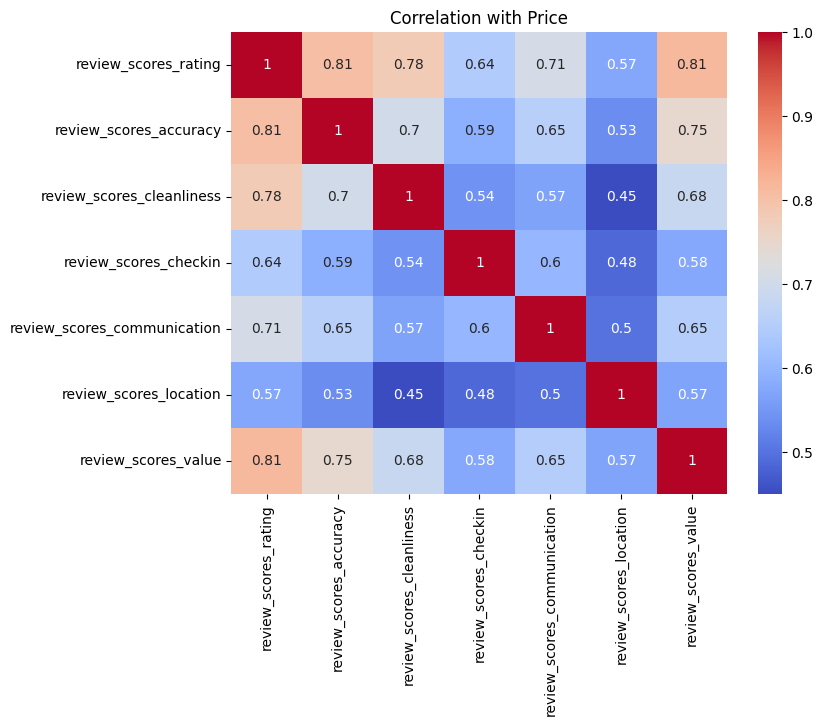

In [ ]:
# review score 칼럼 간의 상관관계: 0.57 ~ 0.81 정도 -> 매우 높음!! -> ML 할 땐 review_scores_rating 하나만 하기로 했다~

# NaN 처리
df_score = df_no_NaN.iloc[:, 7:14]

# 상관계수 계산
corr = df_score.corr()

# heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

In [40]:
df.nlargest(5, 'price')

,id,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
13884,1152660137338301863,f,t,35.701169,139.711497,Entire rental unit,Entire home/apt,4,1.0,1.0,...,"[""Hair dryer"", ""Clothing storage"", ""Fire extin...",1,5.00,5.00,5.00,5.00,5.00,5.0,5.00,8711110.0
14693,1181748125859376165,t,t,35.664629,139.693979,Entire serviced apartment,Entire home/apt,5,1.0,1.0,...,"[""Bidet"", ""Room-darkening shades"", ""Private pa...",20,4.95,5.00,4.95,4.50,4.85,4.8,4.60,7154285.0
13144,1125105431762016220,t,t,35.701991,139.705128,Room in hotel,Private room,3,1.0,1.0,...,"[""Bidet"", ""Room-darkening shades"", ""Luggage dr...",84,4.94,4.89,4.96,4.95,4.98,4.9,4.87,1298263.0
17161,1249116652043941721,f,t,35.707332,139.629677,Entire rental unit,Entire home/apt,2,1.0,1.0,...,"[""Hair dryer"", ""Clothing storage"", ""Fire extin...",5,4.80,4.80,4.80,5.00,5.00,4.8,4.60,1198030.0
22691,1387438746586080632,NaN,t,35.705689,139.815216,Room in boutique hotel,Private room,3,0.0,1.0,...,"[""Hair dryer"", ""Fire extinguisher"", ""Lockbox"",...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1142154.0


In [48]:
price_percentile = df['price'].quantile(0.9955)

# 하위 99.55%만 필터링
df_filtered = df_no_NaN[df_no_NaN['price'] <= price_percentile]

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19982 entries, 2 to 25235
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   latitude                     19982 non-null  float64
 1   longitude                    19982 non-null  float64
 2   accommodates                 19982 non-null  int64  
 3   bathrooms                    19982 non-null  float64
 4   bedrooms                     19982 non-null  float64
 5   beds                         19982 non-null  float64
 6   number_of_reviews            19982 non-null  int64  
 7   review_scores_rating         19982 non-null  float64
 8   review_scores_accuracy       19982 non-null  float64
 9   review_scores_cleanliness    19982 non-null  float64
 10  review_scores_checkin        19982 non-null  float64
 11  review_scores_communication  19982 non-null  float64
 12  review_scores_location       19982 non-null  float64
 13  review_scores_value  

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\tower\AppData\Local\Temp\ipykernel_15884\446537468.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_need['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\tower\AppData\Local\Temp\ipykernel_15884\446537468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_need['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)


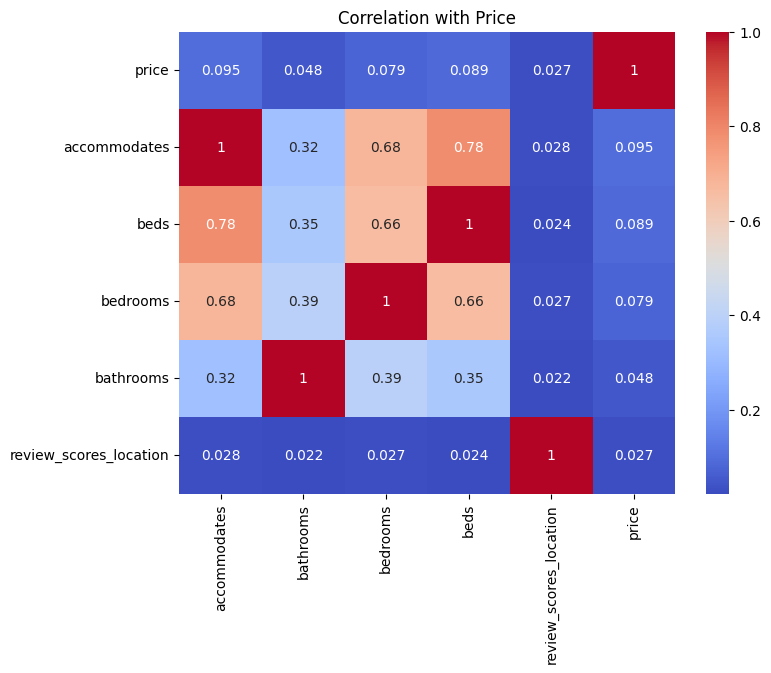

In [ ]:
# bathrooms, bedrooms, beds, accommodates 와 price 상관관계

df_hotel = df_need[df_need['room_type']=='Entire home/apt']

# 상관관계 heatmap

# price float형
df_need['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)

# 수치형 칼럼만 추출
df_nu = df_need[f_columns]
# df_nu['acommodates']=df_nu['accommodates'].astype(float)

# 상관계수 계산
corr = df_nu.corr()

# heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr.sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

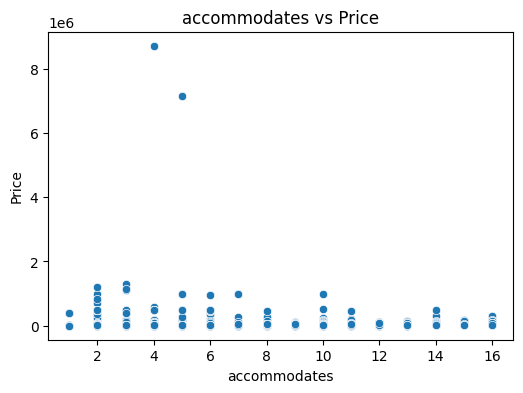

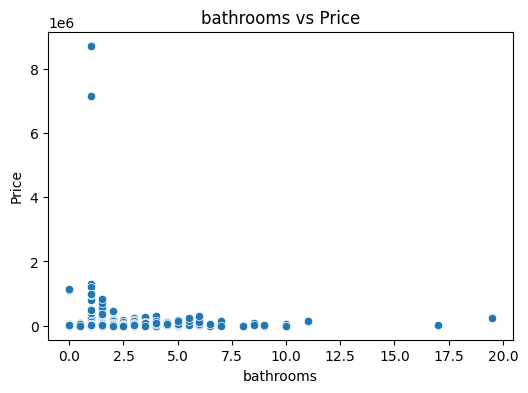

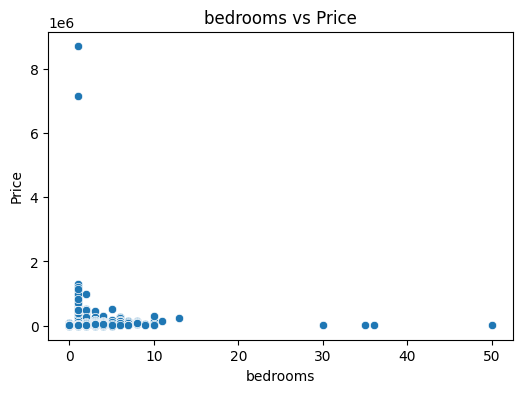

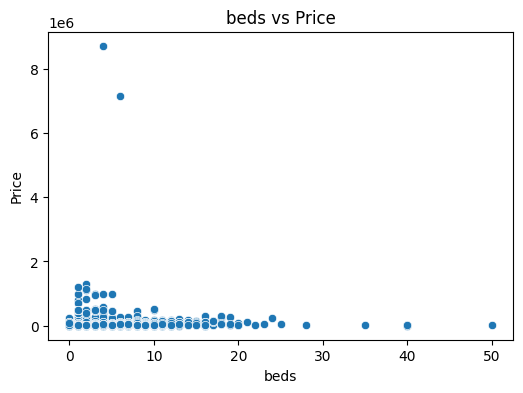

In [ ]:
# 숫자형 칼럼에 따른 가격 산점도
for col in f_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_need, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

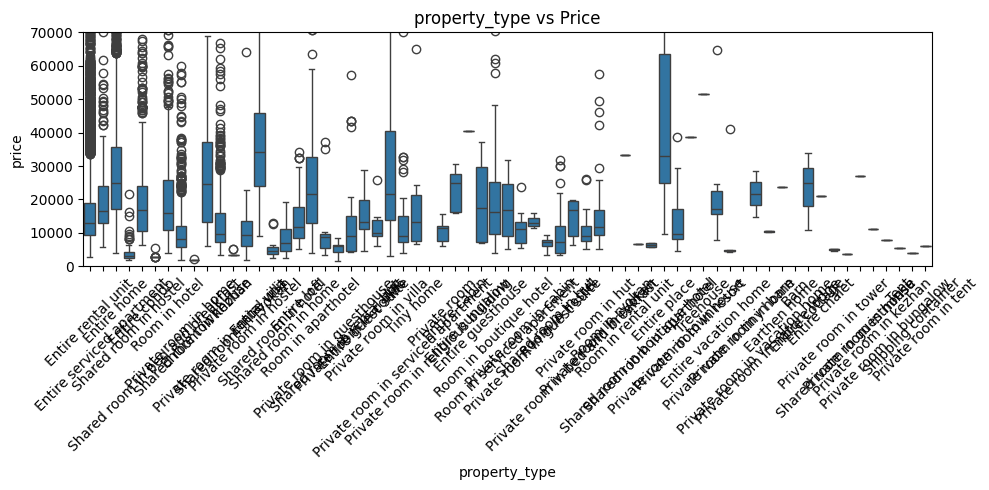

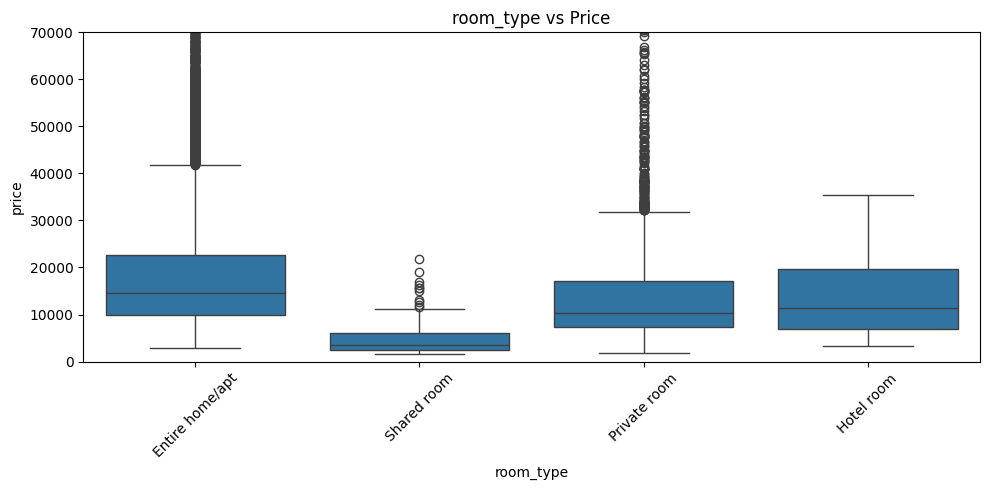

In [ ]:
# 건물, 룸 타입에 따른 박스플롯

for col in ['property_type', 'room_type']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_need, x=col, y='price')
    plt.xticks(rotation=45)
    plt.ylim(0, 70000)
    plt.title(f'{col} vs Price')
    plt.tight_layout()
    plt.show()

# apt 다양.. share room은 확연히 낮은 가격............

In [ ]:
df_apt = df[df['room_type']=='Entire home/apt']

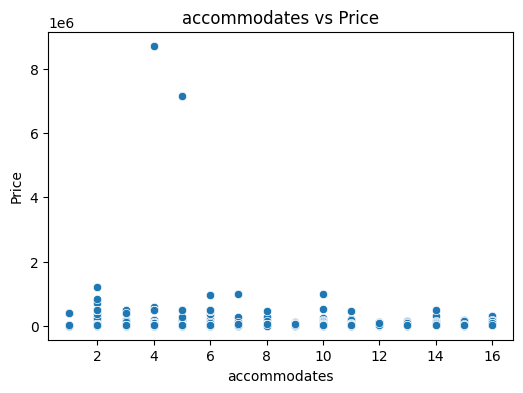

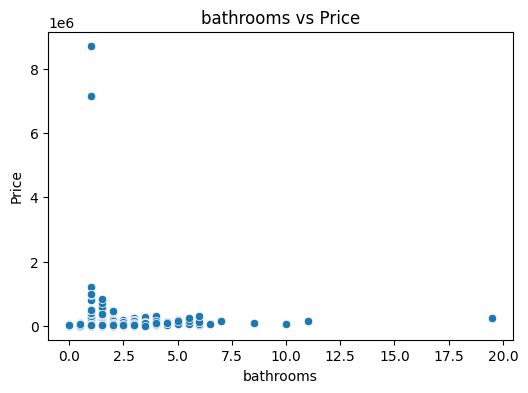

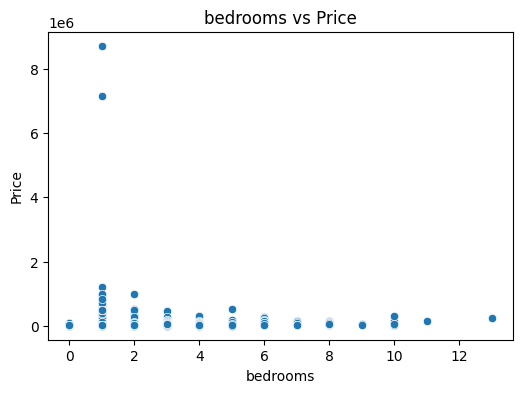

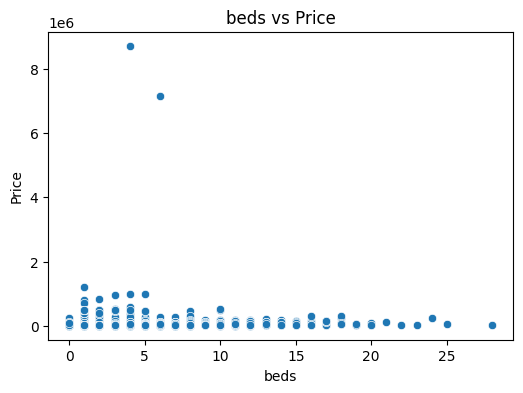

In [ ]:
# 숫자형 칼럼에 따른 가격 산점도
for col in f_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_apt, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [60]:
df_dum['price'] = df_no_NaN[df_no_NaN['price'] <= price_percentile]['price']
df_dum

C:\Users\tower\AppData\Local\Temp\ipykernel_20976\3001609811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dum['price'] = df_no_NaN[df_no_NaN['price'] <= price_percentile]['price']


,amenities,amenity_count,price
0,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",30,NaN
1,"[""Bidet"", ""Body soap"", ""Bed linens"", ""Hot wate...",30,NaN
2,"[""Room-darkening shades"", ""Body soap"", ""Carbon...",29,14550.0
3,"[""Room-darkening shades"", ""Cooking basics"", ""C...",36,22012.0
4,"[""Clothing storage: closet"", ""Elevator"", ""Hair...",48,15429.0
...,...,...,...
25292,"[""Elevator"", ""Hair dryer"", ""Lockbox"", ""Stove"",...",22,NaN
25293,"[""Bidet"", ""Cooking basics"", ""Body soap"", ""Stov...",28,NaN
25294,"[""Record player"", ""Private patio or balcony"", ...",35,NaN
25295,"[""Bidet"", ""Room-darkening shades"", ""Cooking ba...",37,NaN


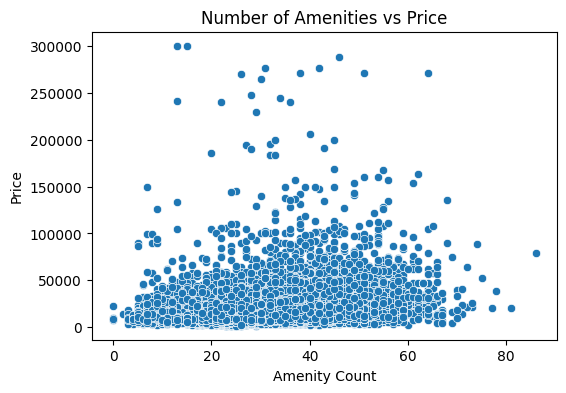

In [62]:
# amenities 수 파악해서 price와 관계

# df['amenity_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
# df_dum = df[['amenities', 'amenity_count']]
# #df_dum['amenity_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
# df_dum['price'] = df_no_NaN[df_no_NaN['price'] <= price_percentile]

df_dum.dropna()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_dum, x='amenity_count', y='price')
plt.title("Number of Amenities vs Price")
plt.xlabel("Amenity Count")
plt.ylabel("Price")
# plt.ylim(0, 700000)
plt.show()
# 고르게 분포를 함 . . . . .................................... 어매니티가 몇 개든............ 고르게...

C:\Users\tower\AppData\Local\Temp\ipykernel_20976\4074874337.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
C:\Users\tower\AppData\Local\Temp\ipykernel_20976\4074874337.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)
C:\Users\tower\AppData\Local\Temp\ipykernel_20976\4074874337.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a

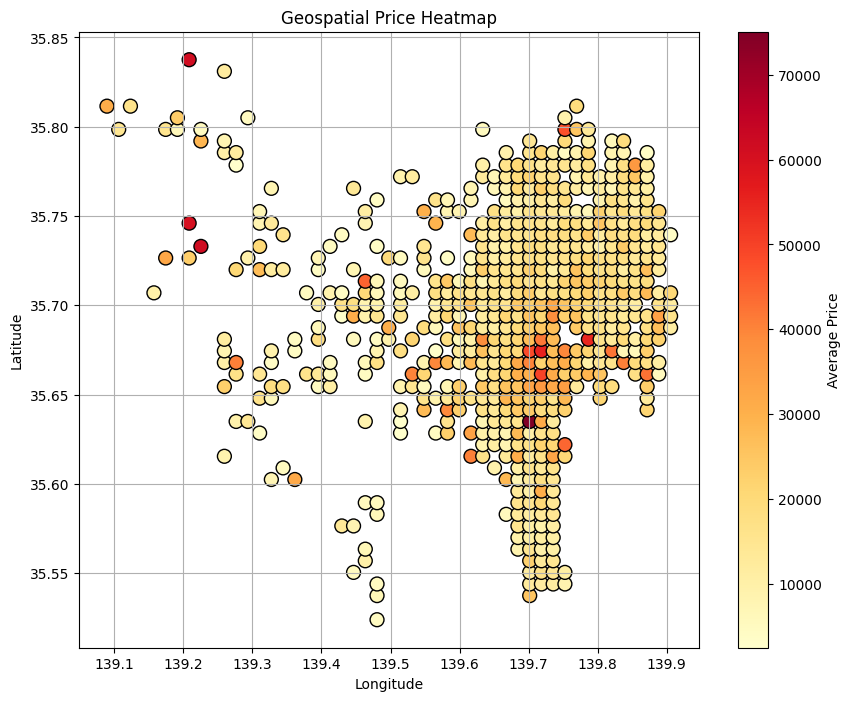

In [53]:
# 위도 경도에 따른 가격 변화~ 극적이지 않음~

# 결측치 제거 (위도/경도/가격)
df_geo = df_filtered[['latitude', 'longitude', 'price']]

# ▶️ 위도/경도 범위를 적절한 bin 단위로 자름 (예: 100m ~ 500m 간격 정도)
lat_bins = np.linspace(df_geo['latitude'].min(), df_geo['latitude'].max(), 50)
lon_bins = np.linspace(df_geo['longitude'].min(), df_geo['longitude'].max(), 50)

# ▶️ 각 위도/경도를 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)

# ▶️ 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
)

# ▶️ bin의 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# ▶️ 시각화 (Scatter 형태의 Heatmap)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='YlOrRd',
    s=100,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.ylim(35.625, 35.775)
# plt.xlim(139.65, 139.8)
plt.title('Geospatial Price Heatmap')
plt.grid(True)
plt.show()

In [77]:
# 하위 99.55%만 필터링
df_filtered = df[df['price'] <= price_percentile]
df_filtered.info()


df_filtered.groupby('neighbourhood_cleansed')['price'].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 23155 entries, 0 to 25296
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23155 non-null  int64  
 1   host_is_superhost            21690 non-null  object 
 2   host_identity_verified       22285 non-null  object 
 3   neighbourhood_cleansed       23155 non-null  object 
 4   latitude                     23155 non-null  float64
 5   longitude                    23155 non-null  float64
 6   property_type                23155 non-null  object 
 7   room_type                    23155 non-null  object 
 8   accommodates                 23155 non-null  int64  
 9   bathrooms                    23147 non-null  float64
 10  bedrooms                     23147 non-null  float64
 11  beds                         23149 non-null  float64
 12  amenities                    23155 non-null  object 
 13  number_of_reviews    

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Adachi Ku,360.0,14913.438889,25178.978941,3943.0,7002.25,10070.5,16858.00,276000.0
Akiruno Shi,21.0,29243.142857,22863.420239,6750.0,14929.00,20846.0,41000.00,89000.0
Akishima Shi,4.0,8699.500000,4402.062888,4600.0,5307.25,8141.5,11533.75,13915.0
Arakawa Ku,213.0,15658.821596,13916.081411,2900.0,8275.00,11829.0,19797.00,99999.0
Bunkyo Ku,402.0,17036.651741,15900.911567,3549.0,9069.00,11809.0,18286.00,100000.0
Chiyoda Ku,203.0,23096.985222,14041.830300,3936.0,13766.50,19929.0,27099.50,85000.0
Chofu Shi,28.0,13772.321429,11692.289986,1800.0,7024.25,9316.5,19502.00,54000.0
Chuo Ku,268.0,22923.164179,15847.309355,5031.0,10624.50,18360.0,29699.50,83572.0
Edogawa Ku,494.0,16031.018219,15680.315885,3230.0,8500.00,13115.0,19730.75,271429.0


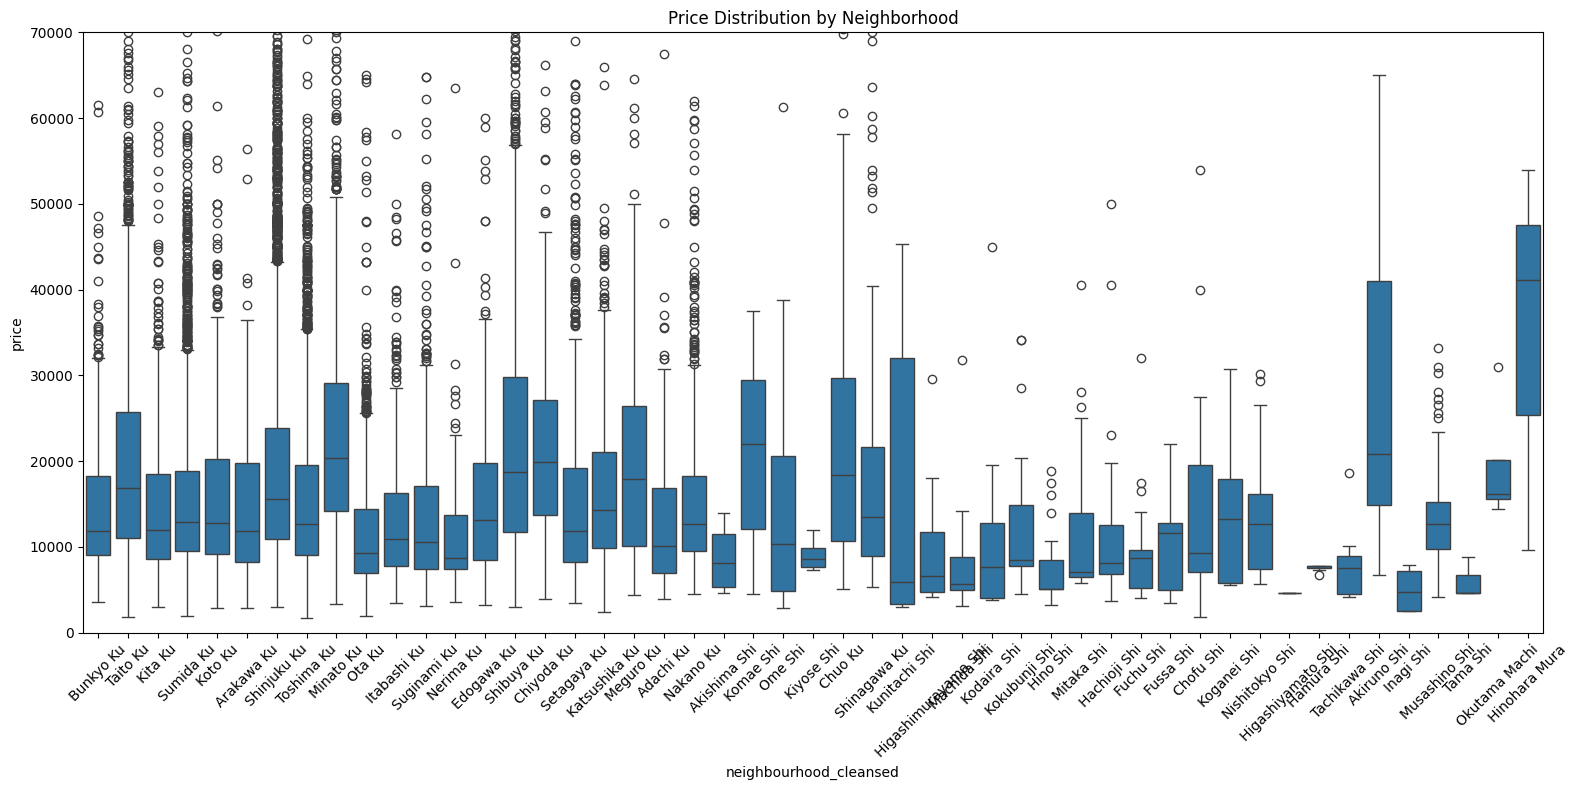

In [83]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_filtered, x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Neighborhood')
plt.tight_layout()
plt.ylim(0, 70000)
plt.show()

### 리뷰 개수에 따른 가격 변화 관찰

가격이 줄어들수록 리뷰 개수가 많아진다는 관계 추측 가능하나, 가격은 y데이터이므로 무의미하다 결론.

In [ ]:
# 숫자형 칼럼에 따른 가격 산점도
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_filtered, x='number_of_reviews', y='price')
# plt.title(f'{col} vs Price')
plt.xlabel('number_of_reviews')
plt.ylabel('Price')
plt.xlim(0, 1600)
plt.show()